So first, what are autoencoders? It's simple: it spells autoencoder meaning automatically encodes the data, it makes high-dimensional data into low-dimensional data, and after reconstructing the low-dimensional data ( the given input data) into high-dimensional data, it basically tries to reconstruct the given data, meaning it tries to learn how to draw an image with the provided image. It's as simple as that.

In [ ]:
The basic artechture of the autoencoder is like this 
encoder---->bottleneck----> decoder 
the encoder encodes or compress the input data into a small dimension data 
the bottelneck often called as latent space captures or extract the important features from the data like lets take the image of zero 
so it capture importaant feature like the edges 
the decoder basically the job is to reconstruct the image just like the original image from  the input data and the loss function we use 
is basic mse 

In [9]:
import keras
from keras import layers

encoding_dim = 32 #The Latent space or the dimension 

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')


so yah there sure alot of question about the latent sapce what it is what it represent and all of that now lets undestand the latent space so it is the low dimension representation of input data that captures import features

In [11]:
from keras.datasets import mnist
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_flat = x_train.reshape((len(x_train), 784))
x_test_flat = x_test.reshape((len(x_test), 784))


In [12]:
# Train the model
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [16]:

# Select zeros from test set
zero_indices = [i for i, label in enumerate(y_test) if label == 0]
zero_images = x_test_flat[zero_indices]

In [17]:
reconstructed_zeros = autoencoder.predict(zero_images)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


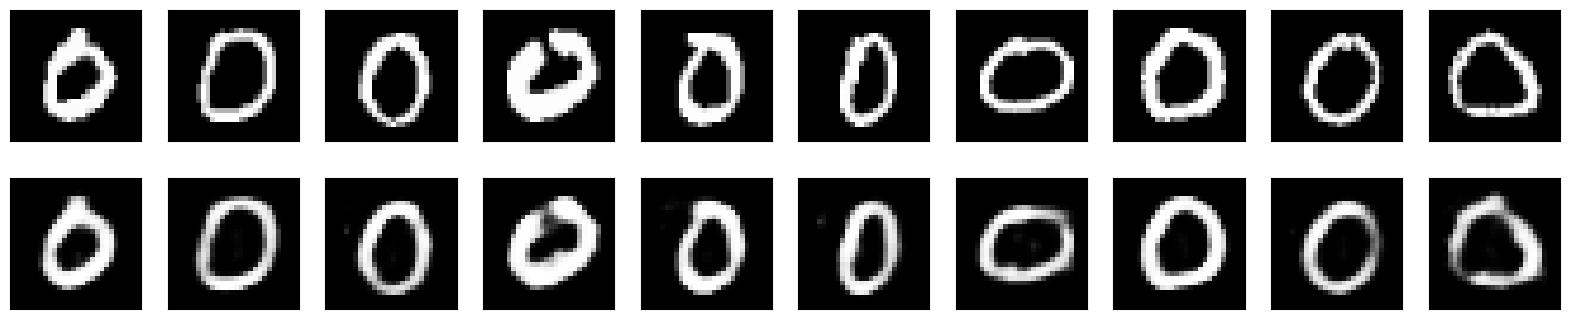

In [20]:
# THE DIFFERENCE BETWEEN ORIGINAL ZERO FROM THE DATASET AND THE RECONSTRUCTED ONE JUST BELOW EACH OTHER
n = 10  # Number of zeros to display
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(zero_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_zeros[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()